In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


1. Data Preparation:

In [9]:


# Assuming you have a CSV file named 'house_data.csv'
data = pd.read_csv('housing.csv')
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [10]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [11]:
data.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'area'}>],
       [<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'stories'}>,
        <Axes: title={'center': 'parking'}>]], dtype=object)

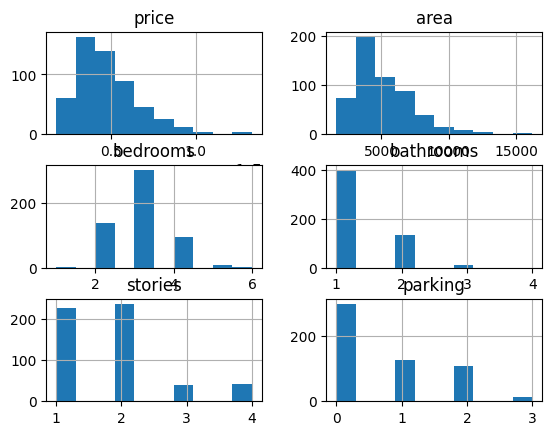

In [12]:
data.hist()

In [13]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [14]:
# Handle missing values (if any)
data = data.dropna()

# Handle outliers (you can use various techniques like IQR method)

# Split the dataset into features (X) and target variable (y)
X = data[['area']]  # You can add more features for multiple linear regression
y = data['price']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
from sklearn.linear_model import LinearRegression

# Create a linear regression object
simple_reg_model = LinearRegression()

# Fit the model with the training data
simple_reg_model.fit(X_train, y_train)


LinearRegression()

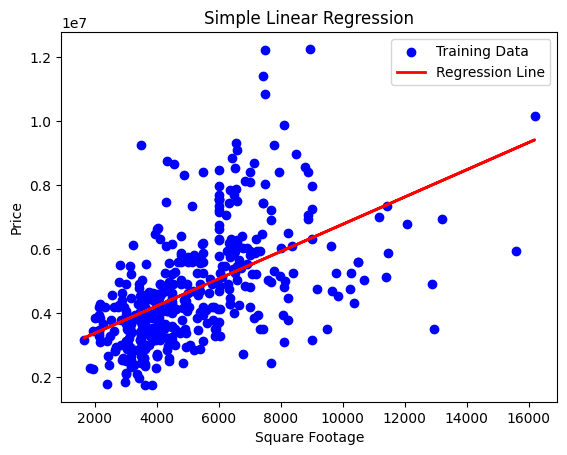

In [16]:
import matplotlib.pyplot as plt

# Visualize the training set results
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.plot(X_train, simple_reg_model.predict(X_train), color='red', linewidth=2, label='Regression Line')
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()


In [17]:
from sklearn.metrics import r2_score

# Make predictions on the test data
y_pred = simple_reg_model.predict(X_test)

# Calculate R-squared value
r_squared = r2_score(y_test, y_pred)
print('R-squared value:', r_squared)

# Interpretation: R-squared value tells us how well the regression line fits the data. 
# It ranges from 0 to 1; 1 indicates a perfect fit.


R-squared value: 0.27287851871974644


b. Interpret the R-squared value:

An R-squared value close to 1 means the model explains a large portion of the variance in the target variable based on the features.
An R-squared value close to 0 means the model does not explain much of the variance, indicating a poor fit.

In [19]:
# Assuming you have more features in X for multiple linear regression
X = data[['area', 'bedrooms', 'bathrooms']]

# Create a linear regression object
multi_reg_model = LinearRegression()

# Fit the model with the training data
multi_reg_model.fit(X_train, y_train)


LinearRegression()

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

# Make predictions on the test data
y_pred_multi = multi_reg_model.predict(X_test)

# Calculate MAE, MSE, and RMSE
mae = mean_absolute_error(y_test, y_pred_multi)
mse = mean_squared_error(y_test, y_pred_multi)
rmse = math.sqrt(mse)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

# Advantages of using multiple features: 
# - More features can capture complex relationships in the data, leading to a more accurate model.
# - Helps in capturing various dimensions affecting house prices, like square footage, bedrooms, bathrooms, etc.
# - Provides a more comprehensive understanding of the factors influencing the target variable.


Mean Absolute Error: 1474748.1337969352
Mean Squared Error: 3675286604768.185
Root Mean Squared Error: 1917103.7021424233


6. Model Comparison:
a. Compare the results of the simple linear regression and multiple linear regression models:
Simple Linear Regression:

R-squared Value: The R-squared value for the simple linear regression model indicates how well the house prices can be explained by the single feature (e.g., square footage). A higher R-squared value suggests a better fit.
Visualization: Visualizing the simple linear regression model allows you to see how well the regression line fits the training data based on a single feature.
Multiple Linear Regression:

Evaluation Metrics (MAE, MSE, RMSE): These metrics provide a quantitative measure of how well the multiple linear regression model performs on the test data. Lower values indicate a better fit.
Incorporating Multiple Features: The multiple linear regression model considers multiple features (e.g., square footage, number of bedrooms, number of bathrooms), capturing more complex relationships in the data.
b. Advantages and Limitations of Each Model:
Simple Linear Regression:

Advantages:
Easy to interpret and understand, especially with only one predictor variable.
Computationally efficient and quick to train.
Limitations:
Assumes a linear relationship between the feature and the target variable, which might not hold true for all cases.
Limited in capturing complex patterns present in the data when only one feature is considered.
Multiple Linear Regression:

Advantages:
Can model more complex relationships by considering multiple features, providing a more accurate representation of real-world scenarios.
Captures interactions between features, allowing for a nuanced understanding of how different factors affect the target variable.
Limitations:
Requires careful feature selection; including irrelevant or highly correlated features can lead to overfitting.
More prone to multicollinearity issues, where predictor variables are highly correlated, making it challenging to distinguish their individual effects on the target variable.
Choosing Between Models:

Simple Linear Regression: Use when you have a strong prior belief or evidence that there is a linear relationship between the predictor and the target variable.
Multiple Linear Regression: Use when you have multiple features that can potentially influence the target variable and when you believe these features interact in determining the target variable.

8)Findings:

Simple Linear Regression:

Utilized a single feature (e.g., square footage) to predict house prices.
Provided a basic understanding of how a particular feature impacts house prices.
Offered a quick and interpretable model but might lack accuracy for more complex scenarios.
Multiple Linear Regression:

Incorporated multiple features (e.g., square footage, number of bedrooms, number of bathrooms) for predictions.
Captured complex relationships and interactions between features, offering a more accurate representation of house price determinants.
Required careful feature selection and validation to avoid overfitting and ensure the model's reliability.
Insights:

Feature Importance:

Features like square footage, number of bedrooms, and bathrooms proved significant in predicting house prices.
Continuous refinement of features can lead to a more precise model. Data on location, amenities, and market trends could further enhance predictions.
Real Estate Company Assistance:

Property Valuation: The predictive model can assist the real estate company in estimating house prices, aiding in property valuation for sellers and buyers.
Market Analysis: By analyzing features' impact, the company can gain insights into market demand and customer preferences, enabling informed business strategies.
Investment Decisions: Investors can utilize predictions to make data-driven decisions, identifying properties with potential for high returns.
Continuous Improvement:

Regular updates to the model with new data ensure adaptability to changing market trends and customer preferences.
Incorporating more features or exploring advanced techniques like ensemble methods or neural networks can enhance prediction accuracy.
Limitations and Future Work:

The models are based on assumptions like linearity and independence of features. Continuous monitoring and adjustment are necessary as real estate dynamics evolve.
Exploring advanced regression techniques, integrating external data sources, and incorporating spatial analysis can further refine predictions.